In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import zipfile, os


In [2]:

import zipfile
import os

zip_path = "/content/archive.zip"
extract_path = "/content/dataset"


if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Dataset extracted at:", extract_path)


Dataset extracted at: /content/dataset


In [3]:
import zipfile
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_path = "/content/archive.zip"
extract_path = "/content/dataset"


if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("Inside /content/dataset:", os.listdir(extract_path))

level1_path = os.path.join(extract_path, "dataset")
print("Inside level1_path:", os.listdir(level1_path))

base_path = os.path.join(level1_path, "DATASET")
print("Using base path:", base_path)
print("Folders inside base path:", os.listdir(base_path))

train_dir = os.path.join(base_path, "TRAIN")
test_dir = os.path.join(base_path, "TEST")

print("Train dir:", train_dir)
print("Test dir:", test_dir)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Inside /content/dataset: ['dataset', 'DATASET']
Inside level1_path: ['DATASET']
Using base path: /content/dataset/dataset/DATASET
Folders inside base path: ['TRAIN', 'TEST']
Train dir: /content/dataset/dataset/DATASET/TRAIN
Test dir: /content/dataset/dataset/DATASET/TEST
Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam


base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    verbose=1
)


for layer in base_model.layers[-30:]:
    layer.trainable = True


model.compile(optimizer=Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Fine-tune
history_finetune = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5,
    verbose=1
)

/tmp/ipython-input-2694224293.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 503s 700ms/step - accuracy: 0.8297 - loss: 0.3885 - val_accuracy: 0.8898 - val_loss: 0.2659
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 487s 690ms/step - accuracy: 0.9119 - loss: 0.2248 - val_accuracy: 0.8838 - val_loss: 0.2624
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 490s 694ms/step - accuracy: 0.9216 - loss: 0.1973 - val_accuracy: 0.8488 - val_loss: 0.3378
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 483s 684ms/step - accuracy: 0.9261 - loss: 0.1882 - val_accuracy: 0.8953 - val_loss: 0.2488
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 491s 695ms/step - accuracy: 0.9289 - loss: 0.1798 - val_accuracy: 0.8723 - val_loss: 0.2898
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 489s 693ms/step - accuracy: 0.9362 - loss: 0.1656 - val_accuracy: 0.8766 - val_loss: 0.2759
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 482s 683ms/step - accuracy: 0.9397 - loss: 0.1559 - val_accuracy: 0.9001 - val_loss: 0.2442
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 499s 708ms/step - accuracy: 0.9435 - loss: 0.14

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode="nearest"
)


In [6]:
for layer in base_model.layers[-30:]:  # last 30 layers fine-tune
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)


In [8]:
tf.keras.layers.Dropout(0.5)


<Dropout name=dropout_1, built=True>

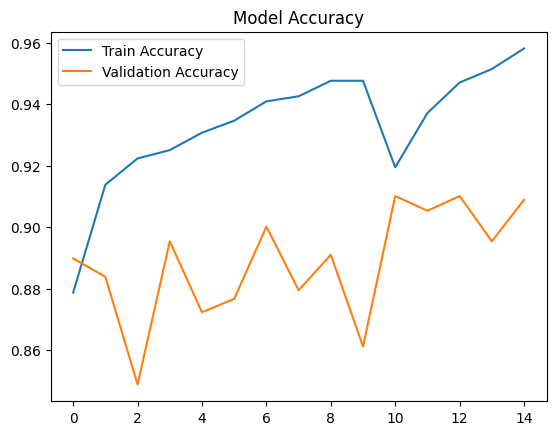

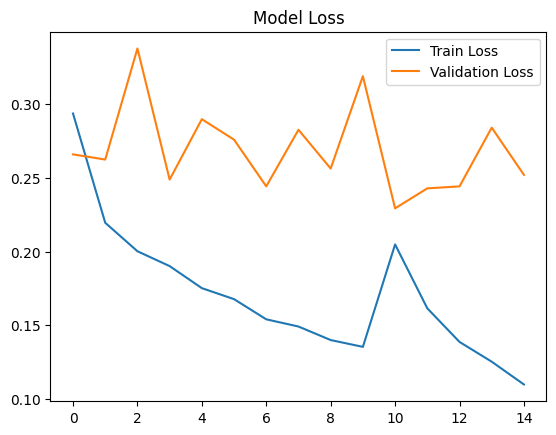

In [9]:
import matplotlib.pyplot as plt


acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']
loss = history.history['loss'] + history_finetune.history['loss']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']


plt.plot(acc, label="Train Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()


plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.title("Model Loss")
plt.show()


In [10]:
loss, acc = model.evaluate(test_generator, verbose=1)
print(f" Final Test Accuracy: {acc*100:.2f}%")


79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 642ms/step - accuracy: 0.8926 - loss: 0.2947
 Final Test Accuracy: 90.89%


In [11]:
model.save("waste_classifier.h5")
print(" Model saved successfully!")


 Model saved successfully!


Model input shape: (None, 150, 150, 3)


Saving Screenshot 2025-09-03 035843.png to Screenshot 2025-09-03 035843 (3).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


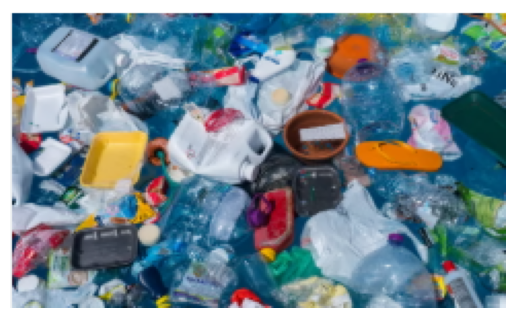

Prediction: Recyclable Waste (96.86%)

 Instructions for Recyclable Waste:
- Paper, plastic, glass ya metal items ko recycle bin me daalo.
- Nearby recycling center me bhejna best option hai.
- Single-use plastics avoid karo, reusable items prefer karo.
- Jalane se bacho, pollution hota hai.


In [19]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print("Model input shape:", model.input_shape)

_, H, W, C = model.input_shape

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename

    img = image.load_img(img_path, target_size=(H, W))
    img_array = image.img_to_array(img)

    img_array = img_array / 255.0

    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    if prediction.shape[-1] == 1:

        prob_class1 = float(prediction[0][0] * 100)
        is_class1 = prediction[0][0] > 0.5
        if is_class1:
            label = "Recyclable Waste"
            prob = prob_class1
        else:
            label = "Organic Waste"
            prob = 100.0 - prob_class1
    else:

        probs = prediction[0]
        idx = int(np.argmax(probs))
        prob = float(np.max(probs) * 100)
        if idx == 0:
            label = "Organic Waste"
        else:
            label = "Recyclable Waste"

    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.show()

    print(f"Prediction: {label} ({prob:.2f}%)")

    if label == "Organic Waste":
        print("\n Instructions for Organic Waste:")
        print("- Isse compost banane ke liye use karo.")
        print("- Green bins (wet waste) me daalo.")
        print("- Fertilizer ke liye process kar sakte ho.")
        print("- Landfill me direct na daalein, environment kharab hota hai.")
    else:
        print("\n Instructions for Recyclable Waste:")
        print("- Paper, plastic, glass ya metal items ko recycle bin me daalo.")
        print("- Nearby recycling center me bhejna best option hai.")
        print("- Single-use plastics avoid karo, reusable items prefer karo.")
        print("- Jalane se bacho, pollution hota hai.")
